In [25]:
!pip install gensim


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [26]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [27]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307636260986), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.87980753


Part 1a

In [28]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

#My answer: The most similarwords to a word of my choice is dog since I think it is the most intuitve categorization based on the other wor

In [29]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [30]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [ ]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document
# Answer: The most interesting dimension that was taken into account was the model man subtracted from model woman. This is simply interesting in the efforts to avoid bias in the data given 

Part 2: Visualization and Embeddings in Space

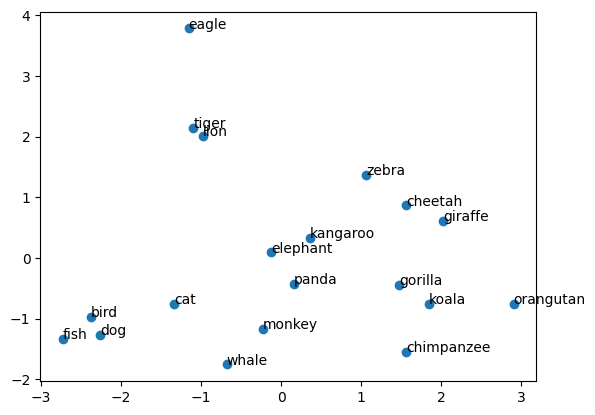

In [ ]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]


pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [33]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.


#The proximity between words and overall distances makes overall sense since the words are all animals and they are all in the same category. The distance between the words is also very close to each other in comparison.

In [34]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


Part 3: Embedding reddit posts

In [59]:
#read in uiuc csv
import pandas as pd

uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")


mich=mich.sample(n=4725)


uiuc['label']=1
mich['label']=0

data = pd.concat([uiuc,mich])




not        2812
like       1188
people     1109
student     967
good        869
class       868
time        806
think       768
year        759
know        754
dtype: int64


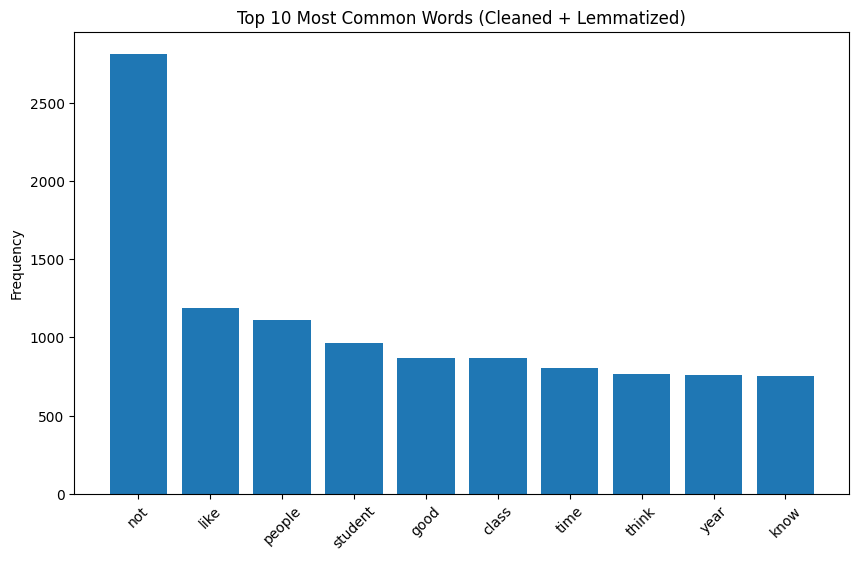

In [36]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy


language_model = spacy.load("en_core_web_sm")


def clean(text):
    text = ' '.join(text.split()).lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    doc = language_model(text)
    tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
    return ' '.join(tokens)


data['cleaned_text'] = data['text'].apply(clean)


vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1, 2))  # unigrams + bigrams
bow_matrix = vectorizer.fit_transform(data['cleaned_text'])



bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())



word_counts = bow_df.sum().sort_values(ascending=False)
print(word_counts.head(10))

# Optional: visualize
import matplotlib.pyplot as plt

top_words = word_counts.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_words.index, top_words.values)
plt.title("Top 10 Most Common Words (Cleaned + Lemmatized)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

Batches:   0%|          | 0/296 [00:00<?, ?it/s]

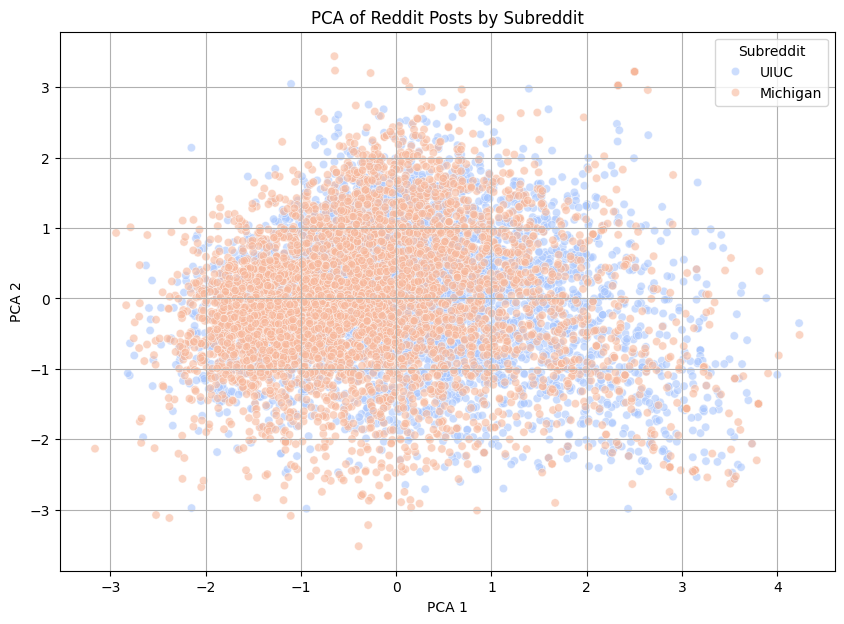

In [39]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 


!pip install seaborn sentence-transformers --quiet


from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = pd.read_csv("uiuc.csv")
data['label'] = 1  # UIUC = 1
mich = pd.read_csv("umich.csv").sample(n=len(data))
mich['label'] = 0  # Michigan = 0

df = pd.concat([data, mich], ignore_index=True)


df['subreddit'] = df['label'].map({1: 'UIUC', 0: 'Michigan'})
model = SentenceTransformer("paraphrase-MiniLM-L6-v2")

embeddings = model.encode(df['text'].tolist(), show_progress_bar=True)

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)


plot_df = pd.DataFrame({
    'x': reduced[:, 0],
    'y': reduced[:, 1],
    'subreddit': df['subreddit'].values
})


plt.figure(figsize=(10, 7))
sns.scatterplot(data=plot_df, x='x', y='y', hue='subreddit', palette='coolwarm', alpha=0.6)
plt.title("PCA of Reddit Posts by Subreddit")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Subreddit')
plt.grid(True)
plt.show()




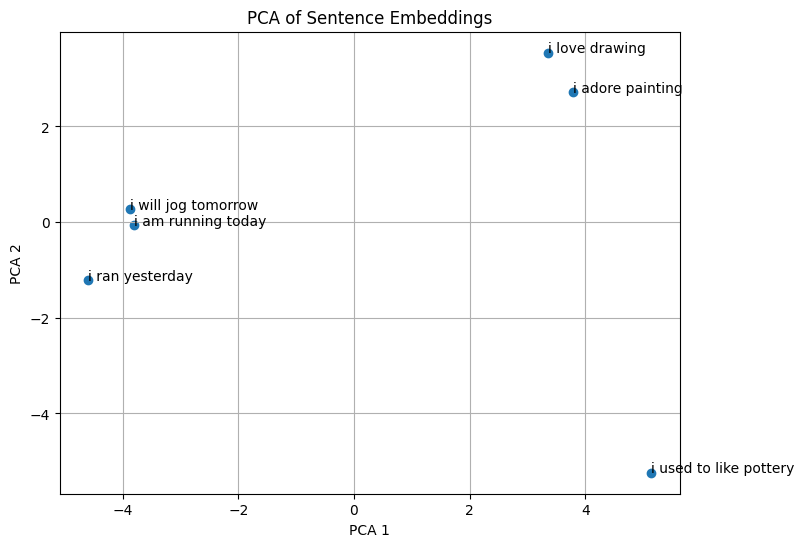

In [41]:
#here is a function to calculate the average embedding of a cleaned document
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


sentences = [
    "i am running today",
    "i will jog tomorrow",
    "i ran yesterday",
    "i love drawing",
    "i adore painting",
    "i used to like pottery"
]

model = SentenceTransformer("paraphrase-MiniLM-L6-v2")

embeddings = model.encode(sentences)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(embeddings)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i, 0], X_pca[i, 1]))

plt.title("PCA of Sentence Embeddings")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


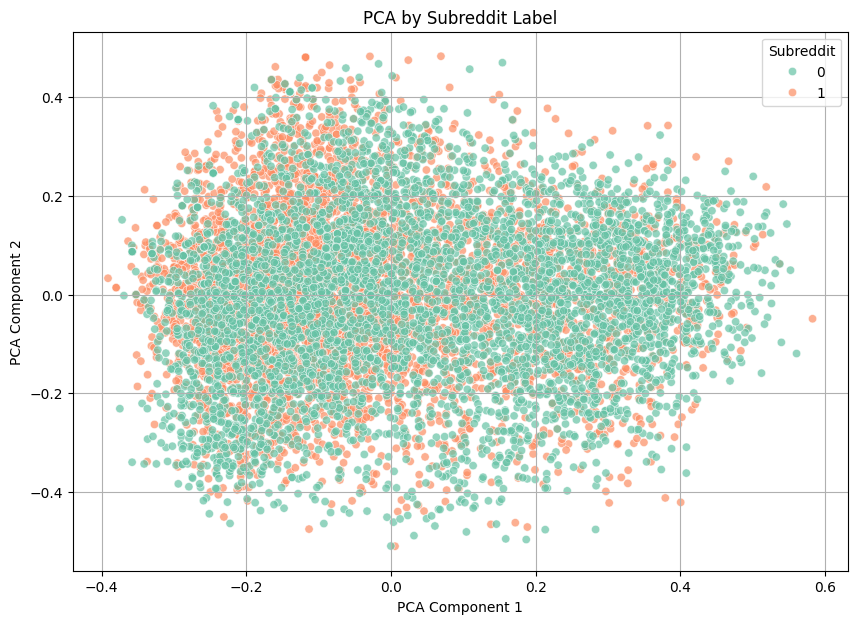

In [ ]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one? Answer: So basically the previous plot that we had, displayed more separation between the two subreddits. This one is much ahrder to interpret and displays how complex the text can be 


#is there clear separation? Answer: There 100% no clear separation between the two columns
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
model = SentenceTransformer('all-MiniLM-L6-v2')  

embeddings = model.encode(df['text'].tolist())


pca = PCA(n_components=2)
X_pca = pca.fit_transform(embeddings)


plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['label'], palette='Set2', alpha=0.7)
plt.title("PCA by Subreddit Label")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title='Subreddit')
plt.show()




Part 4: HuggingFace and BERT

In [43]:
!pip install transformers

In [44]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [49]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("Me and my team are going to work on our Final Project update this Sunday!")

[{'label': 'NEU', 'score': 0.8468136787414551}]

In [50]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

df['short_text'] = df['text'].apply(lambda x: x[:128])
df['sentiment'] = df['short_text'].apply(lambda x: pipe(x)[0]['label'])


print("Most common sentiment label:", df['sentiment'].value_counts().idxmax())
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())


Most common sentiment label: NEU

Sentiment distribution:
sentiment
NEU    5308
NEG    2292
POS    1850
Name: count, dtype: int64


In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 
sample_df = df[['text', 'sentiment']].sample(10, random_state=42)
pd.set_option('display.max_colwidth', None)  
sample_df


#My answer: It seems to mostly accurate in terms of the sentiment of the posts. The ones that caught my attention were the "my bad, I thought their cost" since I think this can be interpreted as a positive in terms of making a valid apology. The 2nd one that caught my eye was "Frita batidos!" since this seems to be more of an excited expression of sorts.Of course context is important but overall it seems pretty good! 

,text,sentiment
3470,Not serious,NEG
1608,They've told me and others that charges arn't finalized yet and we'll get an itemized receipt when they are (imo to get the heat off them until they decide they're all actually final later),NEU
8221,Selling Texas and MSU tickets. DM to discuss and verify!,NEU
8845,I will try contacting the fin aid office again but from past experiences they are very stingy with giving more money especially to OOS students. :/,NEG
7305,Go to the career fair,NEU
5312,"Awesome, this is really good to know. Studying abroad over the summer will cover two semesters of credit!? That’s crazy…\n\nI was planning on taking Spanish, but considering my last Spanish class was in like 6th grade I’m not sure how well I’d do in an accelerated class…\n\nCould I take two normal semesters and then do the study abroad for the rest of the credit?",POS
9355,"I guess this really depends on you, it may or may not. After all it is your first semester and you wanna treat this as a transition to college pace. If pacing becomes a bit overwhelming, at least you have some room to breathe with 13 credits. But if this is too easy for you, it is only your first semester. You can max out to 18 in the upcoming ones.",NEU
6985,"OH MY BAD, I thought their cost of attendance went down im so sorry😭😭",NEG
2880,"back then walking in the quad my weather app wouldn’t even load, how did y’all do anything 👁️👄👁️",NEG
7965,Frita batidos!,NEU


In [58]:
#is the UIUC or Michigan subreddit more negative?

sentiment_counts = df.groupby(['subreddit', 'sentiment']).size().unstack().fillna(0)


sentiment_counts['NEG_PCT'] = sentiment_counts['NEG'] / sentiment_counts.sum(axis=1)
print("Sentiment counts by subreddit:\n", sentiment_counts)

more_negative = sentiment_counts['NEG_PCT'].idxmax()
print(f"\nUIUC or Michican in terms of a more negative subreddit? The result is: {more_negative}")



Sentiment counts by subreddit:
 sentiment   NEG   NEU  POS   NEG_PCT
subreddit                           
Michigan   1189  2665  871  0.251640
UIUC       1103  2643  979  0.233439

UIUC or Michican in terms of a more negative subreddit? The result is: Michigan
